<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/airline_delay_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import keras
from keras.metrics import Precision, Recall
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/airlines_delay.csv")


In [3]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [4]:
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [7]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

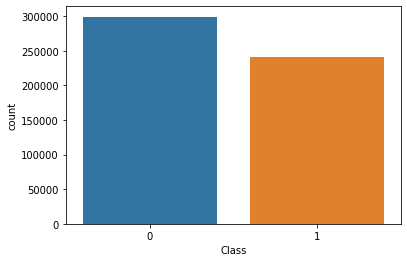

In [5]:
sns.countplot(df['Class'], label = "Count")

In [6]:
df['Class'].value_counts()

0    299118
1    240264
Name: Class, dtype: int64

In [9]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [10]:
df = df.iloc[:,1:]

In [11]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,1296.0,141.0,DL,ATL,HOU,1,0
1,360.0,146.0,OO,COS,ORD,4,0
2,1170.0,143.0,B6,BOS,CLT,3,0
3,1410.0,344.0,US,OGG,PHX,6,0
4,692.0,98.0,FL,BMI,ATL,4,0


In [18]:
a = df[['Airline', 'AirportFrom', 'AirportTo']]
b = df.drop(a, axis=1)
c = pd.get_dummies(a)

In [19]:
b

,Time,Length,DayOfWeek,Class
0,1296.0,141.0,1,0
1,360.0,146.0,4,0
2,1170.0,143.0,3,0
3,1410.0,344.0,6,0
4,692.0,98.0,4,0
...,...,...,...,...
539377,530.0,72.0,5,1
539378,560.0,115.0,4,1
539379,827.0,74.0,2,1
539380,715.0,65.0,4,1


In [20]:
c

,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df = pd.concat([b,c], axis=1)

In [22]:
df.head()

,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,1296.0,141.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,360.0,146.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,143.0,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1410.0,344.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,692.0,98.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
cols = list(df.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
df = df[cols]
df.head()

,Class,Time,Length,DayOfWeek,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,0,1296.0,141.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,360.0,146.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1170.0,143.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1410.0,344.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,692.0,98.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train, test = train_test_split(df, test_size=0.35, random_state = 40)
print("Training Data :", train.shape)
print("Testing Data :", test.shape)

Training Data : (350598, 608)
Testing Data : (188784, 608)


In [25]:
train.head()

,Class,Time,Length,DayOfWeek,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
263031,1,1063.0,118.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97712,1,1330.0,292.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536842,1,570.0,165.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237511,0,650.0,620.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
261014,1,510.0,160.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test.head()

,Class,Time,Length,DayOfWeek,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
309672,1,1152.0,77.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386273,0,1180.0,79.0,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
350725,0,695.0,80.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69486,0,925.0,110.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
417318,1,510.0,80.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_df_x = train.iloc[:,1:]
train_df_x = MinMaxScaler().fit_transform(train_df_x)

test_df_x = test.iloc[:,1:]
test_df_x = MinMaxScaler().fit_transform(test_df_x)

print(train_df_x.shape)
print(test_df_x.shape)

(350598, 607)
(188784, 607)


In [38]:
train_df_y = train.iloc[:,:1]
train_df_y = train_df_y.astype('float32')

test_df_y = test.iloc[:,:1]
test_df_y = test_df_y.astype('float32')

print(train_df_y)
print(test_df_y)

        Class
263031    1.0
97712     1.0
536842    1.0
237511    0.0
261014    1.0
...       ...
138911    1.0
200211    1.0
137031    0.0
114369    0.0
473253    1.0

[350598 rows x 1 columns]
        Class
309672    1.0
386273    0.0
350725    0.0
69486     0.0
417318    1.0
...       ...
368001    1.0
456113    0.0
80011     0.0
38202     1.0
190758    0.0

[188784 rows x 1 columns]


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(75, activation='relu', input_shape = (607,), bias_initializer = 'random_normal'),
    tf.keras.layers.Dense(10, activation='relu', bias_initializer='random_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer='random_normal')
])

In [41]:
# compile the model with binary cross-entropy loss and Adam optimizer, and add precision, recall, and F1 score to the metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)


# train the model using the training set
history = model.fit(train_df_x, train_df_y, epochs=100, batch_size=32, validation_data=(test_df_x, test_df_y))

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_df_x, test_df_y, verbose=0)

# Print the results
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)

Epoch 1/100
10957/10957 [==============================] - 53s 5ms/step - loss: 0.6260 - accuracy: 0.6472 - precision: 0.6453 - recall: 0.4617 - val_loss: 0.6181 - val_accuracy: 0.6566 - val_precision: 0.6539 - val_recall: 0.4865
Epoch 2/100
10957/10957 [==============================] - 49s 4ms/step - loss: 0.6159 - accuracy: 0.6582 - precision: 0.6585 - recall: 0.4833 - val_loss: 0.6163 - val_accuracy: 0.6579 - val_precision: 0.6353 - val_recall: 0.5445
Epoch 3/100
10957/10957 [==============================] - 50s 5ms/step - loss: 0.6118 - accuracy: 0.6623 - precision: 0.6618 - recall: 0.4947 - val_loss: 0.6148 - val_accuracy: 0.6603 - val_precision: 0.6768 - val_recall: 0.4545
Epoch 4/100
10957/10957 [==============================] - 50s 5ms/step - loss: 0.6088 - accuracy: 0.6656 - precision: 0.6637 - recall: 0.5051 - val_loss: 0.6143 - val_accuracy: 0.6614 - val_precision: 0.6473 - val_recall: 0.5270
Epoch 5/100
10957/10957 [==============================] - 49s 5ms/step - loss: 

5900/5900 [==============================] - 16s 3ms/step
Confusion Matrix: 
[[76434 28255]
 [36806 47289]]


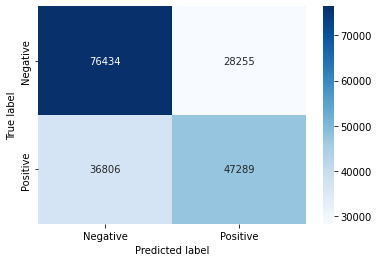

In [46]:
# predict classes for the test set
y_pred_prob = model.predict(test_df_x)
y_pred = (y_pred_prob > 0.5).astype(int)

# generate confusion matrix
cm = confusion_matrix(test_df_y, y_pred, labels=[0,1])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# print confusion matrix
print('Confusion Matrix: ')
print(cm)
plt.show()